### Final Practice
*   Part I: Midterm Material
*   Part II: Non-Midterm Material

_Includes some homework questions, pop quizzes, quizzes, the midterm, etc._

In [1]:
# General Imports
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Directory Paths for Images
data = 'C:/Users/user/OneDrive/Desktop/AUS/4. Senior Year/Spring 2024/COE 49413/Computer-Vision-Repository/course content/data/images'

hw1 = 'C:/Users/user/OneDrive/Desktop/AUS/4. Senior Year/Spring 2024/COE 49413/Homework/COE49413_HW1'
quiz1 = 'C:/Users/user/Downloads/quiz01/quiz01'
quiz2 = 'C:/Users/user/Downloads/quiz2/quiz2'

new_data = 'C:/Users/user/OneDrive/Desktop/AUS/4. Senior Year/Spring 2024/COE 49413/Computer-Vision-Repository/data'

#### _Part I:_
*   _Image Formation_
*   _Image Filtering_
*   _Edge Detection_
*   _Corner Detection_
*   _Blob Detection_
*   _SIFT Detection_
*   _Image Transformation & Stitching_
*   _Artificial Neural Networks (ANN)_
*   _Convolutional Neural Networks (CNN)_

#### _Part II:_
*   _Pretrained Models_
*   _Detection and Segmentation_
*   _Stereo Vision_
*   _Optical Flow_

Exercise 1: Use the pre-trained ResNet50 Model from the PyTorch library for training and testing on the CIFAR10 dataset. Additionally, evaluate the model on the image 'motorbike.jpeg'

In [5]:
from torchvision import models

# initialize the model
vgg16 = models.vgg16(weights = models.VGG16_Weights.DEFAULT)
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [6]:
'''
after loading the pretrained model, we want to load its transformation function, such that we can preprocess the images based on
how the model was initially trained
'''
preprocess = models.VGG16_Weights.DEFAULT.transforms()

# freeze the weights of the pre-trained layers
for param in vgg16.parameters():
    param.requires_grad = False

# add a new classification head on top of the pre-trained network to match the number of classes in the provided dataset
noFeatures = vgg16.classifier[6].in_features
vgg16.classifier[6] = nn.Linear(noFeatures, 10)
print(vgg16.classifier)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=10, bias=True)
)


In [7]:
torch.manual_seed(0)

# load the training & testing datasets
transform = transforms.Compose([
    transforms.ToTensor(),
    preprocess
])

trainset = datasets.CIFAR10(
    root = '~/Downloads/',
    train = True,
    download = True,
    transform = transform
)

testset = datasets.CIFAR10(
    root = '~/Downloads/',
    train = False,
    download = True,
    transform = transform
)

# create dataloaders for each set of data
batchSize = 64
trainloader = DataLoader(trainset, batchSize, shuffle = True)
testloader = DataLoader(testset, batchSize, shuffle = False)

Files already downloaded and verified
Files already downloaded and verified


In [17]:
print('Classes: ', trainset.classes)
print('Total: ', len(trainset.classes))

print('\nClass to Index: ', trainset.class_to_idx)
idx_to_class = {value : key for key, value in trainset.class_to_idx.items()}
print('Index to Class: ', idx_to_class)

Classes:  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Total:  10

Class to Index:  {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
Index to Class:  {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


Text(0.5, 1.0, 'truck')

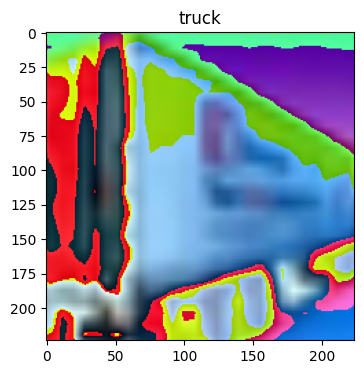

In [18]:
type(trainset[0])               # tuple
trainset[0][0].shape            # 3 x 224 x 224 --> i.e., RGB image with 224 x 224 dimensions

trainset[0]                     # object composed of image as tensor (X) and label (Y)
trainset[0][0]                  # image as tensor object
trainset[0][1]                  # label

# to display the image, we need to apply a transformation
# this is because the size of the image is depth x dimensions in Pytorch, whereas in matplotlib, the size is expected as dimensions x depth
transform_back = transforms.Compose([
    transforms.Normalize(mean = (-1., -1., -1.), std = (2., 2., 2.)),
    transforms.ToPILImage()
])
plt.figure(figsize = (4, 4))
plt.imshow(transform_back(trainset[15][0]))
plt.title(idx_to_class[trainset[15][1]])

In [8]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
vgg16.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16.classifier[6].parameters(), lr = 0.001)
train_history = []
validation_history = []

In [22]:
# training the model
vgg16.train()

for epoch in range(5):
    train_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # forward pass
        optimizer.zero_grad()
        outputs = vgg16(inputs)

        # backward pass
        loss = criterion(outputs, labels)
        loss.backward()

        # update parameters
        optimizer.step()

        train_loss += loss.item()

    # validation
    with torch.no_grad():
        validation_loss = 0.0
        for data in testloader:
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = vgg16(inputs)
            loss = criterion(outputs, labels)

            validation_loss += loss.item()
    print(f'Epoch [{epoch}]: Train Loss = {train_loss / len(trainset)}, Validation Loss = {validation_loss / len(testset)}')
    train_history += [train_loss / len(trainset)]
    validation_history += [validation_loss / len(testset)]
print('\nFinished Training')

Epoch [0]: Train Loss = 0.010793565018773078, Validation Loss = 0.010857786172628402
Epoch [1]: Train Loss = 0.009958783404231071, Validation Loss = 0.01055773284137249
Epoch [2]: Train Loss = 0.00985785144507885, Validation Loss = 0.010961612612009048
Epoch [3]: Train Loss = 0.009762479301989079, Validation Loss = 0.011119880646467208
Epoch [4]: Train Loss = 0.009924622639119625, Validation Loss = 0.010957765147089958

Finished Training


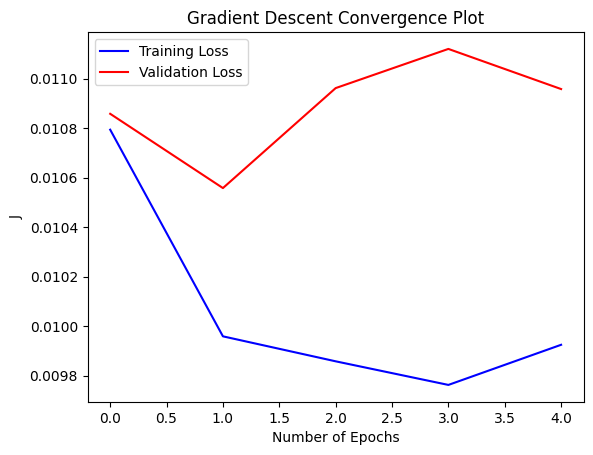

In [23]:
# plotting the gradient descent
plt.plot(train_history, 'b', label = 'Training Loss')
plt.plot(validation_history, 'r', label = 'Validation Loss')
plt.legend()

plt.xlabel('Number of Epochs')
plt.ylabel('J')
plt.title('Gradient Descent Convergence Plot')
plt.show()

In [24]:
# testing
images, labels = next(iter(testloader))
images = images.to(device)
labels = labels.to(device)

outputs = vgg16(images)
_, predicted = torch.max(outputs, dim = 1)

for i in range(10):
    print(f'Actual {idx_to_class[labels[i].item()]} \t Predicted: {idx_to_class[predicted[i].item()]}')

Actual cat 	 Predicted: cat
Actual ship 	 Predicted: ship
Actual ship 	 Predicted: ship
Actual airplane 	 Predicted: ship
Actual frog 	 Predicted: frog
Actual frog 	 Predicted: frog
Actual automobile 	 Predicted: automobile
Actual frog 	 Predicted: frog
Actual cat 	 Predicted: cat
Actual automobile 	 Predicted: automobile


In [25]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)

        outputs = vgg16(images)
        _, predictions = torch.max(outputs, dim = 1)
        total += labels.size(0)
        correct += (predictions == labels).sum().item()

print(f'Accuracy of the Network on the {total} Test Images: {100 * correct / total}%')

Accuracy of the Network on the 10000 Test Images: 77.04%


In [26]:
# full classification report results

with torch.no_grad():
    y_true = []  # list to store ground truth labels
    y_pred = []  # list to store predicted labels

    for testing_batch in testloader:
        images, labels = testing_batch

        images = images.to(device)
        labels = labels.to(device)

        predicted_labels = vgg16(images)
        _, predictions = torch.max(predicted_labels, dim = 1)

        # append ground truth labels and predictions to the respective lists
        y_true.extend(labels.tolist())
        y_pred.extend(predictions.tolist())

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average = 'macro')
    recall = recall_score(y_true, y_pred, average = 'macro')
    f1 = f1_score(y_true, y_pred, average = 'macro')
    report = classification_report(y_true, y_pred, target_names = testset.classes)

    print("Overall Model Performance:\n")
    print(f'- Accuracy: {accuracy * 100:.2f} %')
    print(f'- Precision: {precision * 100:.2f} %')
    print(f'- Recall: {recall * 100:.2f} %')
    print(f'- F1-score: {f1 * 100:.2f} %')

    print(f'\nIndividual Class Performance:\n\n {report}')

Overall Model Performance:

- Accuracy: 76.99 %
- Precision: 77.11 %
- Recall: 76.99 %
- F1-score: 76.87 %

Individual Class Performance:

               precision    recall  f1-score   support

    airplane       0.74      0.85      0.79      1000
  automobile       0.83      0.86      0.84      1000
        bird       0.75      0.68      0.71      1000
         cat       0.66      0.60      0.63      1000
        deer       0.70      0.75      0.72      1000
         dog       0.77      0.69      0.72      1000
        frog       0.77      0.85      0.81      1000
       horse       0.76      0.81      0.78      1000
        ship       0.83      0.84      0.83      1000
       truck       0.90      0.78      0.84      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



In [9]:
# evaluating the model on motorbike.jpeg
vgg16.eval()

weights = models.VGG16_Weights.DEFAULT
weights.meta['categories']

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python',
 'Indian cobr

great white shark: 23.75367432832718%


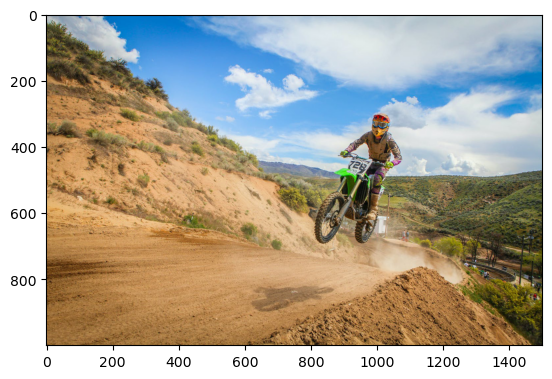

In [10]:
preprocess = models.VGG16_Weights.DEFAULT.transforms()

from PIL import Image
motorbike = Image.open(os.path.join(data, 'motorbike.jpeg')).convert('RGB')

preprocessed_image = preprocess(motorbike).unsqueeze(0)    # this will reshape the tensor to the correct shape

# apply the model to the image
prediction = vgg16(preprocessed_image).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta['categories'][class_id]
print(f'{category_name}: {100 * score}%')

# display the image
plt.imshow(motorbike)

Exercise 2: Apply semantic segmentation on 'dogs.jpg' using Fully Convolutional Neural Networks (FCN)

Exercise 3: Apply object detection to 'sheep.jpg' using YOLOv5

Exercise 4: Using the images 'left1.jpg' and 'right1.jpg', compute the essential and fundamental matrices to plot the epipolar lines and their corresponding points. Select a random point on the second image ('right1.jpg') and draw the corresponding line in the first image ('left1.jpg')

In [3]:
# read the images
left = cv2.imread(os.path.join(new_data, 'images', 'left1.jpg'), cv2.IMREAD_GRAYSCALE)
right = cv2.imread(os.path.join(new_data, 'images', 'right1.jpg'), cv2.IMREAD_GRAYSCALE)

# initialize SIFT detector
sift = cv2.SIFT_create()
kpL, desL = sift.detectAndCompute(left, None)
kpR, desR = sift.detectAndCompute(right, None)

# create a Brute Force Matcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(desL, desR, k = 2)

ptsL = []
ptsR = []

# apply ratio test as per Lowe's Paper
for i, (m, n) in enumerate(matches):
    if m.distance < 0.8 * n.distance:
        ptsL.append(kpL[m.queryIdx].pt)
        ptsR.append(kpR[m.trainIdx].pt)

In [4]:
# compute the essential matrix
ptsL_ = np.array(ptsL)
ptsR_ = np.array(ptsR)
E, mask = cv2.findEssentialMat(points1 = ptsL_, points2 = ptsR_, cameraMatrix = np.eye(3), method = cv2.RANSAC)

# now, we can decompose the essential matrix E into rotation R and translation t
R_L, R_R, t = cv2.decomposeEssentialMat(E)

# only select the inlier points using the mask variable
ptsL_ = ptsL_[mask.ravel() == 1]
ptsR_ = ptsR_[mask.ravel() == 1]

In [5]:
# compute the fundamental matrix
ptsL_ = np.array(ptsL)
ptsR_ = np.array(ptsR)
F, mask = cv2.findFundamentalMat(points1 = ptsL_, points2 = ptsR_, method = cv2.RANSAC)

# only select the inlier points using the mask variable
ptsL_ = ptsL_[mask.ravel() == 1]
ptsR_ = ptsR_[mask.ravel() == 1]

In [6]:
# compute the epipolar -- plot the line on the left image and a random point on the right image
# but first, we need to define some functions as the fundamental matrix only works on homogeneous points

# converts 2D coordinates (shape = (N, 2)) to homogeneous coordinates (shape = (N, 3))
def to_homogeneous(coordinates):
    # Check if the input array is a NumPy array
    if not isinstance(coordinates, np.ndarray):
        raise ValueError("Input must be a NumPy array")
    
    # Check if the input array has the correct shape
    if coordinates.shape[1] != 2:
        raise ValueError("Input array must have shape (N, 2)")
    
    # Add a column of ones to the coordinates to make them homogeneous
    homogeneous_coordinates = np.hstack((coordinates, np.ones((coordinates.shape[0], 1))))
    
    return homogeneous_coordinates

# converts homogeneous coordinates (shape = (N, 3)) to non-homogeneous coordinates (shape = (N, 2))
def from_homogeneous(coordinates):
    # Check if the input array is a NumPy array
    if not isinstance(coordinates, np.ndarray):
        raise ValueError("Input must be a NumPy array")
    
    # Check if the input array has the correct shape
    if coordinates.shape[1] != 3:
        raise ValueError("Input array must have shape (N, 3)")
    
    # Divide the first two columns by the third column to obtain non-homogeneous coordinates
    non_homogeneous_coordinates = coordinates[:, :2] / coordinates[:, 2][:, None]
    
    return non_homogeneous_coordinates

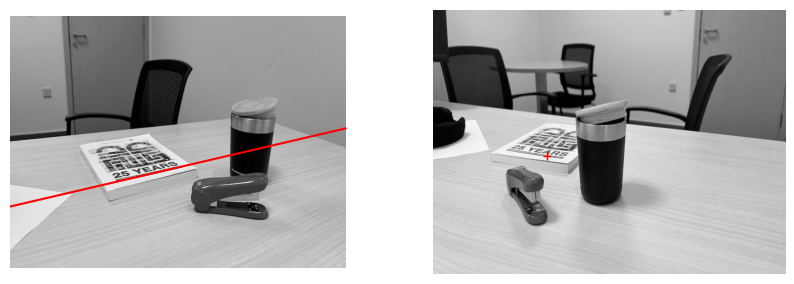

In [7]:
# l = F dot p                       # p = point in one image

lineL = to_homogeneous(ptsR_).dot(F)
rows, cols = left.shape

# select a random point index for the right image
pts_index = 10

# equation of the epipolar line --> ax + by + c = 0
a = lineL[pts_index, 0]
b = lineL[pts_index, 1]
c = lineL[pts_index, 2]

y0 = -c / b                         # left boundary (x = 0)
y1 = (-c - a * left.shape[1]) / b   # right boundary (x = image.shape[1])

plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.imshow(left, cmap = 'gray')
plt.axis('off')
plt.plot([0, left.shape[1]], [y0, y1], 'r')

plt.subplot(1, 2, 2)
plt.imshow(right, cmap = 'gray')
plt.axis('off')
plt.plot(ptsR_[pts_index, 0], ptsR_[pts_index, 1], 'r+')
plt.show()

Repeat the same exercise, but instead, select a random point on the left image and plot the corresponding line on the right image

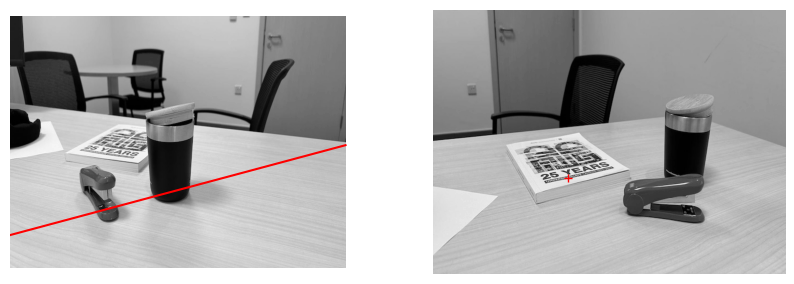

In [8]:
# l = F dot p                       # p = point in one image

lineR = to_homogeneous(ptsL_).dot(F)
rows, cols = right.shape

# select a random point index for the right image
pts_index = 10

# equation of the epipolar line --> ax + by + c = 0
a = lineR[pts_index, 0]
b = lineR[pts_index, 1]
c = lineR[pts_index, 2]

y0 = -c / b                          # left boundary (x = 0)
y1 = (-c - a * right.shape[1]) / b   # right boundary (x = image.shape[1])

plt.figure(figsize = (10, 10))

plt.subplot(1, 2, 1)
plt.imshow(right, cmap = 'gray')
plt.axis('off')
plt.plot([0, right.shape[1]], [y0, y1], 'r')

plt.subplot(1, 2, 2)
plt.imshow(left, cmap = 'gray')
plt.axis('off')
plt.plot(ptsL_[pts_index, 0], ptsL_[pts_index, 1], 'r+')

plt.show()